<a href="https://colab.research.google.com/github/hayaboy/ds/blob/master/%EC%88%98%EC%B9%98%EC%98%88%EC%B8%A1%EB%AA%A9%EC%A0%81%EC%9D%84_%EC%9C%84%ED%95%9C_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%AA%A8%EB%8D%B8_%EC%9D%91%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression

In [2]:
# %matplotlib inline

#### 1.1. Read in data and visualize: 

In [6]:
pd.read_csv('./sample_data/data_galton.csv')

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


In [8]:
df=pd.read_csv('./sample_data/data_galton.csv')

In [15]:
df.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In [16]:
pd.crosstab(df.parent,df.child)

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


In [17]:
myTable=pd.crosstab(df.parent,df.child)

In [18]:
nrows=myTable.shape[0]
ncols=myTable.shape[1]

In [19]:
childHeights=list(myTable.columns)
parentHeights=list(myTable.index)

In [20]:
combo = [ (x,y,myTable.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

In [21]:
combo

,x,y,freq
0,64.0,61.7,1
1,64.0,62.2,0
2,64.0,63.2,2
3,64.0,64.2,4
4,64.0,65.2,1
...,...,...,...
149,73.0,70.2,0
150,73.0,71.2,0
151,73.0,72.2,1
152,73.0,73.2,3


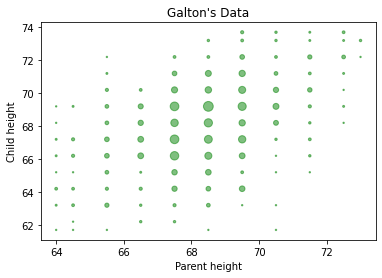

In [22]:
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='green',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Data")
plt.show()

#### 1.2. Linear regression training:

In [5]:
# help(LinearRegression)

In [3]:
# Instantiate a linear regression object.
lm = LinearRegression(fit_intercept=True)

In [9]:
# Train.
lm.fit(df[['parent']],df[['child']])

LinearRegression()

In [10]:
# Show the slope.
lm.coef_

array([[0.64629058]])

In [11]:
# Show the intercept.
lm.intercept_

array([23.94153018])

#### 1.3. Visualization of the regression line

In [12]:
# Predicted Y.
predY = lm.predict(df[['parent']])

In [14]:
# predY

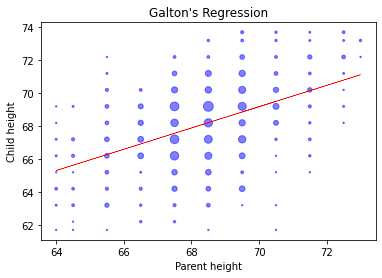

In [23]:
# Show the Scatter plot + Regression line.
plt.plot(df.parent.values,predY,c = 'red',linestyle='-',linewidth=0.5)
plt.scatter(combo.x, combo.y, s=combo.freq*2, c='blue',alpha=0.5)
plt.xlabel('Parent height')
plt.ylabel('Child height')
plt.title("Galton's Regression")
plt.show()

### 1. Linear regression and diagnostics:

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics

1.1. Load the 'Boston' dataset from Scikit-Learn:

In [27]:
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [28]:
# Display the dictionary keys.
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [29]:
# Display the description on the data.
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [30]:
# The explanatory variables.
X = data['data']
header = data['feature_names']

In [31]:
# The response variable.
Y = data['target']
Y = Y.reshape(-1, 1)

In [32]:
Y

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19


1.2. Convert the data into a DataFrame and then explore:

In [33]:
df = pd.DataFrame(np.append(X,Y,axis = 1))
df.columns = list(header)+['PRICE']

In [34]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [35]:
# Descriptive statistics of the variables (columns).
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
# Pair-wise correlation matrix.
np.round(df.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


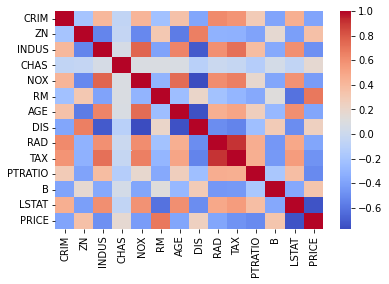

In [37]:
# Visualize the correlation matrix.
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

In [45]:
X[:,5]

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [46]:
Y[:,0]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

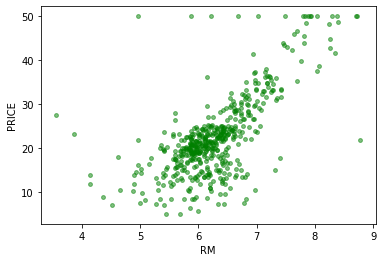

In [38]:
# Visualize RM vs PRICE.
plt.scatter(X[:,5],Y[:,0],c = 'g',s=15,alpha=0.5)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.show()

1.3. Train by linear regression:

In [39]:
# Train.
lm = LinearRegression(fit_intercept=True)
lm.fit(X,Y)

LinearRegression()

In [43]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [44]:
# Y

In [40]:
# The intercept.
lm.intercept_

array([36.45948839])

In [41]:
# The rest of coefficients (parameters).
lm.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [47]:
# Display the parameters as a DataFrame.
parametersDF = pd.DataFrame(lm.coef_,index=['Parameter Value'],columns=header)
parametersDF['Intercept'] = lm.intercept_[0]
parametersDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Intercept
Parameter Value,-0.108011,0.04642,0.020559,2.686734,-17.766611,3.809865,0.000692,-1.475567,0.306049,-0.012335,-0.952747,0.009312,-0.524758,36.459488


1.4. Diagnostics:

In [48]:
# In-sample prediction.
predY = lm.predict(X)

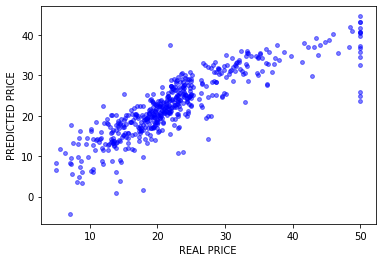

In [49]:
# Display real Y vs predicted Y.
plt.scatter(Y,predY,c = 'blue', s=15, alpha=0.5)
plt.xlabel('REAL PRICE')
plt.ylabel('PREDICTED PRICE')
plt.show()

In [50]:
# Calculate the correlation between the real Y and predicted Y.
pd.Series(Y[:,0]).corr(pd.Series(predY[:,0]))

0.8606059865637753

In [51]:
# Coefficient of determination (R^2):
lm.score(X,Y)

0.7406426641094095

In [56]:
len(X)

506

In [57]:
len(Y)

506

In [60]:
# help(pd.DataFrame)

In [64]:
df1=pd.DataFrame(X[ :,5 ])

In [66]:
df2=pd.DataFrame(Y)

In [68]:
pd.concat([df1, df2], axis=1)

,0,0
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [69]:
df3=pd.concat([df1, df2], axis=1)

In [70]:
from google.colab import files

df3.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1.5. In-sample and out-of-sample testing:

In [71]:
# Split the dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 13)
(152, 13)
(354, 1)
(152, 1)


In [72]:
# predY_in = in-sample prediction of Y.
# predY_out = out-of-sample prediction of Y.
lm = LinearRegression()
lm.fit(X_train,Y_train)
predY_in = lm.predict(X_train)
predY_out = lm.predict(X_test)

In [74]:
Y_pred_train=lm.predict(X_train)

In [75]:
Y_pred_test=lm.predict(X_test)

In [77]:
print('In-sample MSE is      : ' + str(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('Out-of-sample MSE is  : ' + str(metrics.mean_squared_error(Y_test, Y_pred_test)))
print('-'*50)
print('In-sample RMSE is     : ' + str(np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))))
print('Out-of-sample RMSE is : ' + str(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))))

In-sample MSE is      : 20.184336639873152
Out-of-sample MSE is  : 28.40585481050822
--------------------------------------------------
In-sample RMSE is     : 4.492698146979513
Out-of-sample RMSE is : 5.329714327288867


1.6. Residual analysis:

In [78]:
# Calculate residual.
residual = Y_train - predY_in

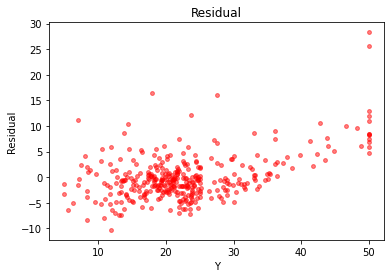

In [79]:
# Q: Can you check "visually" that the mean = 0 and variance = constant?
plt.scatter(Y_train,residual,c = 'red', s=15, alpha=0.5)
plt.xlabel('Y')
plt.ylabel('Residual')
plt.title('Residual')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


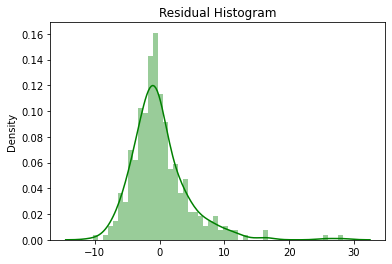

In [80]:
# Q: Are the residuals normally distributed centered around 0?
sns.distplot(residual, bins=50, color='green').set_title("Residual Histogram")
plt.show()

1.7. Given a new set of values for the explanatory variables, predict the response:

CRIM : 0.03
ZN : 0.0
INDUS : 13.0
CHAS : 0.0
NOX : 0.4
RM : 4.3
AGE : 23.5
DIS : 1.9
RAD : 1.0
TAX : 273.0
PTRATIO : 18.0
B : 380.0
LSTAT : 7.5

In [81]:
X_new = np.array([0.03, 0.0, 13.0, 0.0, 0.4, 4.3, 23.5, 1.9, 1.0, 273.0, 18.0, 380.0, 7.5]).reshape(1,-1)  # Reshaped as a row.
Y_pred_new = lm.predict(X_new)
print(np.round(Y_pred_new[0,0],3))

20.594



1. Linear regression diagnostics and modeling using StatsModels library:

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### 1.1. Load the 'Boston' dataset from Scikit-Learn and convert it into a DataFrame:

In [83]:
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [84]:
# The explanatory variables.
X = data['data']
header = data['feature_names']

In [85]:
# The response variable.
Y = data['target']
Y = Y.reshape(-1, 1)

In [86]:
# Transform into a DataFrame.
df = pd.DataFrame(np.append(X,Y,axis = 1))
df.columns = list(header) + ['PRICE']

1.2. Linear modeling using R-styled formula:

In [87]:
# Using all the explanatory variables.
myModel1 = smf.ols(formula = "PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT ", data=df)
result1 = myModel1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 18 Mar 2022   Prob (F-statistic):          6.72e-135
Time:                        07:02:44   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**NOTE: INDUS and AGE do not seem to be significant. Adjusted $R^2 = 0.734$ and $AIC = 3026$.** 

CONCLUSION: The second model is slightly optimized compared to the first one.

### 1. Linear regression prediction and confidence interval:

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn import metrics

1.1. Data:

study = an array that contains the hours of study. This is the explanatory variable.
score = an array that contains the test scores. This is the response variable.

In [89]:
study = np.array([ 3, 4.5, 6, 1.2, 2, 6.9, 6.7, 5.5])
score = np.array([ 88, 85, 90, 80, 81, 92, 95, 90])
n = study.size

#### 1.2. Training:

In [90]:
# Instantiate a linear regression object.
lm = LinearRegression()

In [91]:
# Train.
lm.fit(study.reshape(-1,1), score.reshape(-1,1))

LinearRegression()

In [92]:
# Get the parameters.
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
print(b0)
print(b1)

77.68466977583873
2.2213028433879947


In [93]:
# Calculate the in-sample RMSE.
predScore = lm.predict(study.reshape(-1,1))
mse = metrics.mean_squared_error(score, predScore)
rmse=np.sqrt(mse)
np.round(rmse,2)

1.93

####  1.3. Confidence interval and visualization:

In [95]:
# We define here the function that calculates standard error.
# Refer to the formula given in the lecture note.
def StdError(x_star, x_vec, mse, n):
    x_mean = np.mean(x_vec)
    return (np.sqrt(mse*(1/n+(x_star-x_mean)**2/np.sum((x_vec-x_mean)**2))))

In [96]:
# y_hat : the predicted y.
# y_low : lower bound of the confidence interval (95%).
# y_up : upper bound of the confidence interval (95%).
x_star = np.linspace(1,9,10)
y_hat = b0 + b1*x_star
y_low = y_hat - st.t.ppf(0.975,n-2)*StdError(x_star,study,mse,n)
y_up = y_hat + st.t.ppf(0.975,n-2)*StdError(x_star,study,mse,n)

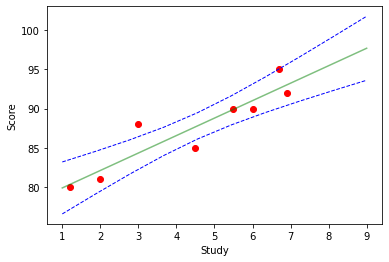

In [97]:
# Now, disaply.
plt.scatter(study, score, c='red')
plt.plot(x_star,y_low,c = 'blue',linestyle='--',linewidth=1)
plt.plot(x_star,y_hat,c = 'green',linewidth = 1.5, alpha=0.5)
plt.plot(x_star,y_up,c = 'blue',linestyle='--',linewidth=1)
plt.xlabel('Study')
plt.ylabel('Score')
plt.show()

### 1. Dummy variable and interaction:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

1.1. Read in the data:

In [3]:
import pandas as pd

In [5]:
# help(pd.read_csv)

In [6]:
df = pd.read_csv('./sample_data/data_studentlist.csv')

In [7]:
df.head()

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [9]:
lm = LinearRegression()
X = df.height.values.reshape(-1,1)
Y = df.weight.values.reshape(-1,1)

In [10]:
lm.fit(X,Y)

LinearRegression()

In [16]:
lm.intercept_[0]

-109.44527907648313

In [12]:
lm.coef_

array([[1.00279172]])

In [15]:
lm.coef_[0][0]

1.0027917194700802

In [17]:
rsq1 = lm.score(X,Y)

In [18]:
rsq1

0.4411371950671862

In [19]:
rmse1 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

In [20]:
rmse1

8.595442055909126

In [22]:
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]

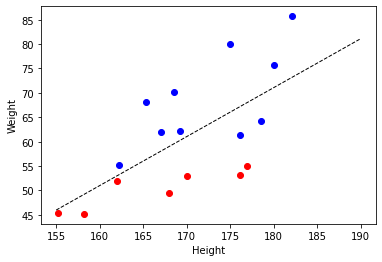

In [23]:
# Visualize.
# No need to distinguish the regression line by gender.
df_m = df[df.gender=='M']
df_f = df[df.gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='black')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

1.3. Linear regression with dummy variable:

The formula is: weight ~ height + gender

In [25]:
df.gender

0     M
1     F
2     M
3     M
4     F
5     F
6     F
7     F
8     M
9     M
10    M
11    M
12    M
13    F
14    F
15    M
16    M
Name: gender, dtype: object

In [28]:
# help(pd.get_dummies)

In [29]:
gender_dummy2 = pd.get_dummies(df.gender, prefix='gender')

In [30]:
gender_dummy2

,gender_F,gender_M
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,0,1


In [24]:
# Create a dummy variable for 'gender':
gender_dummy = pd.get_dummies(df.gender, drop_first=True, prefix='gender')

In [26]:
gender_dummy

,gender_M
0,1
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [31]:
X = df[['height']].join(gender_dummy)
Y = df[['weight']]

In [32]:
X

,height,gender_M
0,165.3,1
1,170.1,0
2,175.0,1
3,182.1,1
4,168.0,0
5,162.0,0
6,155.2,0
7,176.9,0
8,178.5,1
9,176.1,1


In [ ]:
#변수1개(키) r square 0.4411m, rmse :  8.595
#변수2개(키, 성별)

In [33]:
# Do the regression as usual.
lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
rsq2 = lm.score(X,Y)
rmse2 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

In [34]:
rsq2

0.7616802135154483

In [35]:
rmse2

5.613008042087499

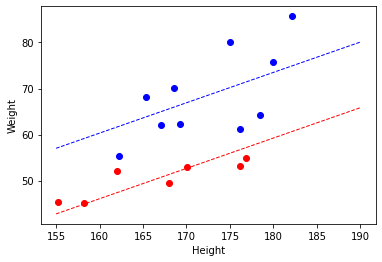

In [36]:
# Visualize.
# Distinguish the regression lines by gender.
df_m = df[df.gender=='M']
df_f = df[df.gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + b1*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

1.4. Linear regression with dummy variable that interacts:

The formula is: weight ~ height + gender + height  ×  gender

In [37]:
# Create a dummy variable for 'gender':
gender_dummy = pd.get_dummies(df.gender, drop_first=True, prefix='gender')
X = df[['height']].join(gender_dummy)
Y = df[['weight']]

In [38]:
# Create the interaction term. 
X['height x gender_M'] = X['height']*X['gender_M']
X.head(5)

,height,gender_M,height x gender_M
0,165.3,1,165.3
1,170.1,0,0.0
2,175.0,1,175.0
3,182.1,1,182.1
4,168.0,0,0.0


In [39]:
# Do the regression as usual.
lm.fit(X,Y)
b0 = lm.intercept_[0]
b1 = lm.coef_[0][0]
b2 = lm.coef_[0][1]
b3 = lm.coef_[0][2]
rsq3 = lm.score(X,Y)
rmse3 = np.sqrt(metrics.mean_squared_error(Y, lm.predict(X)))

In [40]:
rsq3

0.7869245048697691

In [41]:
rmse3

5.307406684107363

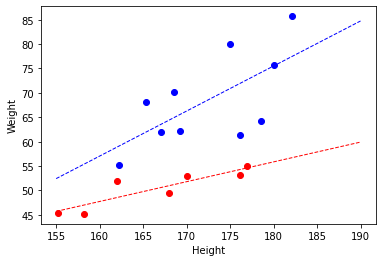

In [42]:
# Visualize.
# Distinguish the regression lines by gender.
df_m = df[df.gender=='M']
df_f = df[df.gender=='F']
x_grid = np.linspace(155,190,10)
plt.scatter(x=df_m.height, y=df_m.weight, color='blue')
plt.scatter(x=df_f.height, y=df_f.weight, color='red')
plt.plot(x_grid, b0 + b1*x_grid, linestyle='--',linewidth=1,color='red')
plt.plot(x_grid, (b0 + b2) + (b1+b3)*x_grid, linestyle='--',linewidth=1,color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

#### 1.5. Compare  $R^2$, RMSE for the different cases:

In [43]:
np.round([rsq1, rsq2, rsq3],3)  

array([0.441, 0.762, 0.787])

In [44]:
np.round([rmse1, rmse2, rmse3],3)

array([8.595, 5.613, 5.307])

NOTE: With a dummy variable that interacts, the  R2  is the highest and the RMSE is the lowest.

1. Regularized regressions:

In [45]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

1.1. Read in data:
The dataset comes from 1974 MotoTrend US Magazine.

In [46]:
"""
[, 1]	mpg	Miles/(US) gallon
[, 2]	cyl	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs	Engine (0 = V-shaped, 1 = straight)
[, 9]	am	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
[,11]	carb	Number of carburetors
"""

'\n[, 1]\tmpg\tMiles/(US) gallon\n[, 2]\tcyl\tNumber of cylinders\n[, 3]\tdisp\tDisplacement (cu.in.)\n[, 4]\thp\tGross horsepower\n[, 5]\tdrat\tRear axle ratio\n[, 6]\twt\tWeight (1000 lbs)\n[, 7]\tqsec\t1/4 mile time\n[, 8]\tvs\tEngine (0 = V-shaped, 1 = straight)\n[, 9]\tam\tTransmission (0 = automatic, 1 = manual)\n[,10]\tgear\tNumber of forward gears\n[,11]\tcarb\tNumber of carburetors\n'

In [48]:
df = pd.read_csv('./sample_data/data_mtcars.csv')

In [49]:
df.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [50]:
# Separate into X and Y.
X=df.drop(columns=['model','mpg'])
Y=df.mpg

In [51]:
# Split the dataset.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

1.2. Ridge regression:

In [52]:
lambdaRange = range(1,100)

In [53]:
from sklearn.linear_model import Ridge, Lasso

In [54]:
bestRsq = 0.0                                                # To contain the best R^2.
bestLambda = 0.0                                             # To contain the best lambda.
for aLambda in lambdaRange:
    ridge = Ridge(aLambda)
    ridge.fit(X_train,Y_train)                               # Train with the training set.
    rsq = ridge.score(X_test,Y_test)                         # Calculate R^2 with the testing set. 
    if (rsq > bestRsq):                                      # If R^2 is better, replace bestRsq.
        bestRsq = rsq
        bestLambda = aLambda
        print("Lambda = ", bestLambda, " and  R^2 = ", np.round(rsq,3))
ridge = Ridge(bestLambda)                                    # Final run with the bestLambda.
ridge.fit(X,Y)                                                  

Lambda =  1  and  R^2 =  0.779
Lambda =  2  and  R^2 =  0.813
Lambda =  3  and  R^2 =  0.822
Lambda =  4  and  R^2 =  0.825
Lambda =  5  and  R^2 =  0.825


Ridge(alpha=5)

In [55]:
# Show the intercept.
ridge.intercept_

28.58776326642277

In [56]:
# Show other parameters.
ridge.coef_

array([-0.51185256, -0.00768344, -0.01533332,  0.61667067, -1.39209019,
       -0.00709397,  0.11850925,  0.94390866,  0.71148287, -0.7038523 ])

NOTE: In Ridge, even when  λ  is large no parameter is exactly 0.

#### 1.3. Lasso regression:

In [57]:
lambdaRange = range(1,100)

In [58]:
bestRsq = 0.0                                                # To contain the best R^2.
bestLambda = 0.0                                             # To contain the best lambda.
for aLambda in lambdaRange:
    lasso = Lasso(aLambda)
    lasso.fit(X_train,Y_train)                               # Train with the training set.
    rsq = lasso.score(X_test,Y_test)                         # Calculate R^2 with the testing set. 
    if (rsq > bestRsq):                                      # If R^2 is better, replace bestRsq.
        bestRsq = rsq
        bestLambda = aLambda
        print("Lambda = ", bestLambda, " and  R^2 = ", np.round(rsq,3))
lasso = Lasso(bestLambda)                                    # Final run with the bestLambda.
lasso.fit(X,Y) 

Lambda =  1  and  R^2 =  0.735
Lambda =  2  and  R^2 =  0.743
Lambda =  3  and  R^2 =  0.744
Lambda =  4  and  R^2 =  0.744
Lambda =  5  and  R^2 =  0.744
Lambda =  6  and  R^2 =  0.745
Lambda =  7  and  R^2 =  0.745
Lambda =  8  and  R^2 =  0.745
Lambda =  9  and  R^2 =  0.746
Lambda =  10  and  R^2 =  0.746
Lambda =  11  and  R^2 =  0.746
Lambda =  12  and  R^2 =  0.747
Lambda =  13  and  R^2 =  0.747
Lambda =  14  and  R^2 =  0.747
Lambda =  15  and  R^2 =  0.747
Lambda =  16  and  R^2 =  0.747
Lambda =  17  and  R^2 =  0.748
Lambda =  18  and  R^2 =  0.748
Lambda =  19  and  R^2 =  0.748
Lambda =  20  and  R^2 =  0.748
Lambda =  21  and  R^2 =  0.749
Lambda =  22  and  R^2 =  0.749
Lambda =  23  and  R^2 =  0.749
Lambda =  24  and  R^2 =  0.749
Lambda =  25  and  R^2 =  0.749
Lambda =  26  and  R^2 =  0.749
Lambda =  27  and  R^2 =  0.749
Lambda =  28  and  R^2 =  0.75
Lambda =  29  and  R^2 =  0.75
Lambda =  30  and  R^2 =  0.75
Lambda =  31  and  R^2 =  0.75
Lambda =  32  and  R^

Lasso(alpha=41)

In [59]:
# Show the intercept.
lasso.intercept_

29.481705776221872

In [60]:
# Show other parameters.
lasso.coef_

array([-0.       , -0.0335117, -0.0113111,  0.       , -0.       ,
        0.       ,  0.       ,  0.       ,  0.       , -0.       ])

Lasso can make some parameters exactly 0 when  λ  is large enough.